In [ ]:
import warnings
warnings.simplefilter(action = 'ignore')
warnings.filterwarnings('ignore')

In [ ]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("csafrit2/maternal-health-risk-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'maternal-health-risk-data' dataset.
Path to dataset files: /kaggle/input/maternal-health-risk-data


In [ ]:
import os

os.listdir(path)

['Maternal Health Risk Data Set.csv']

In [ ]:
# turns into dataframe

m_df = pd.read_csv(f"{path}/Maternal Health Risk Data Set.csv")
m_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
print(f'Rows and Columns of Dataset are : {m_df.shape}')

Rows and Columns of Dataset are : (1014, 7)


In [ ]:
m_df['RiskLevel'].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


In [ ]:
m_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


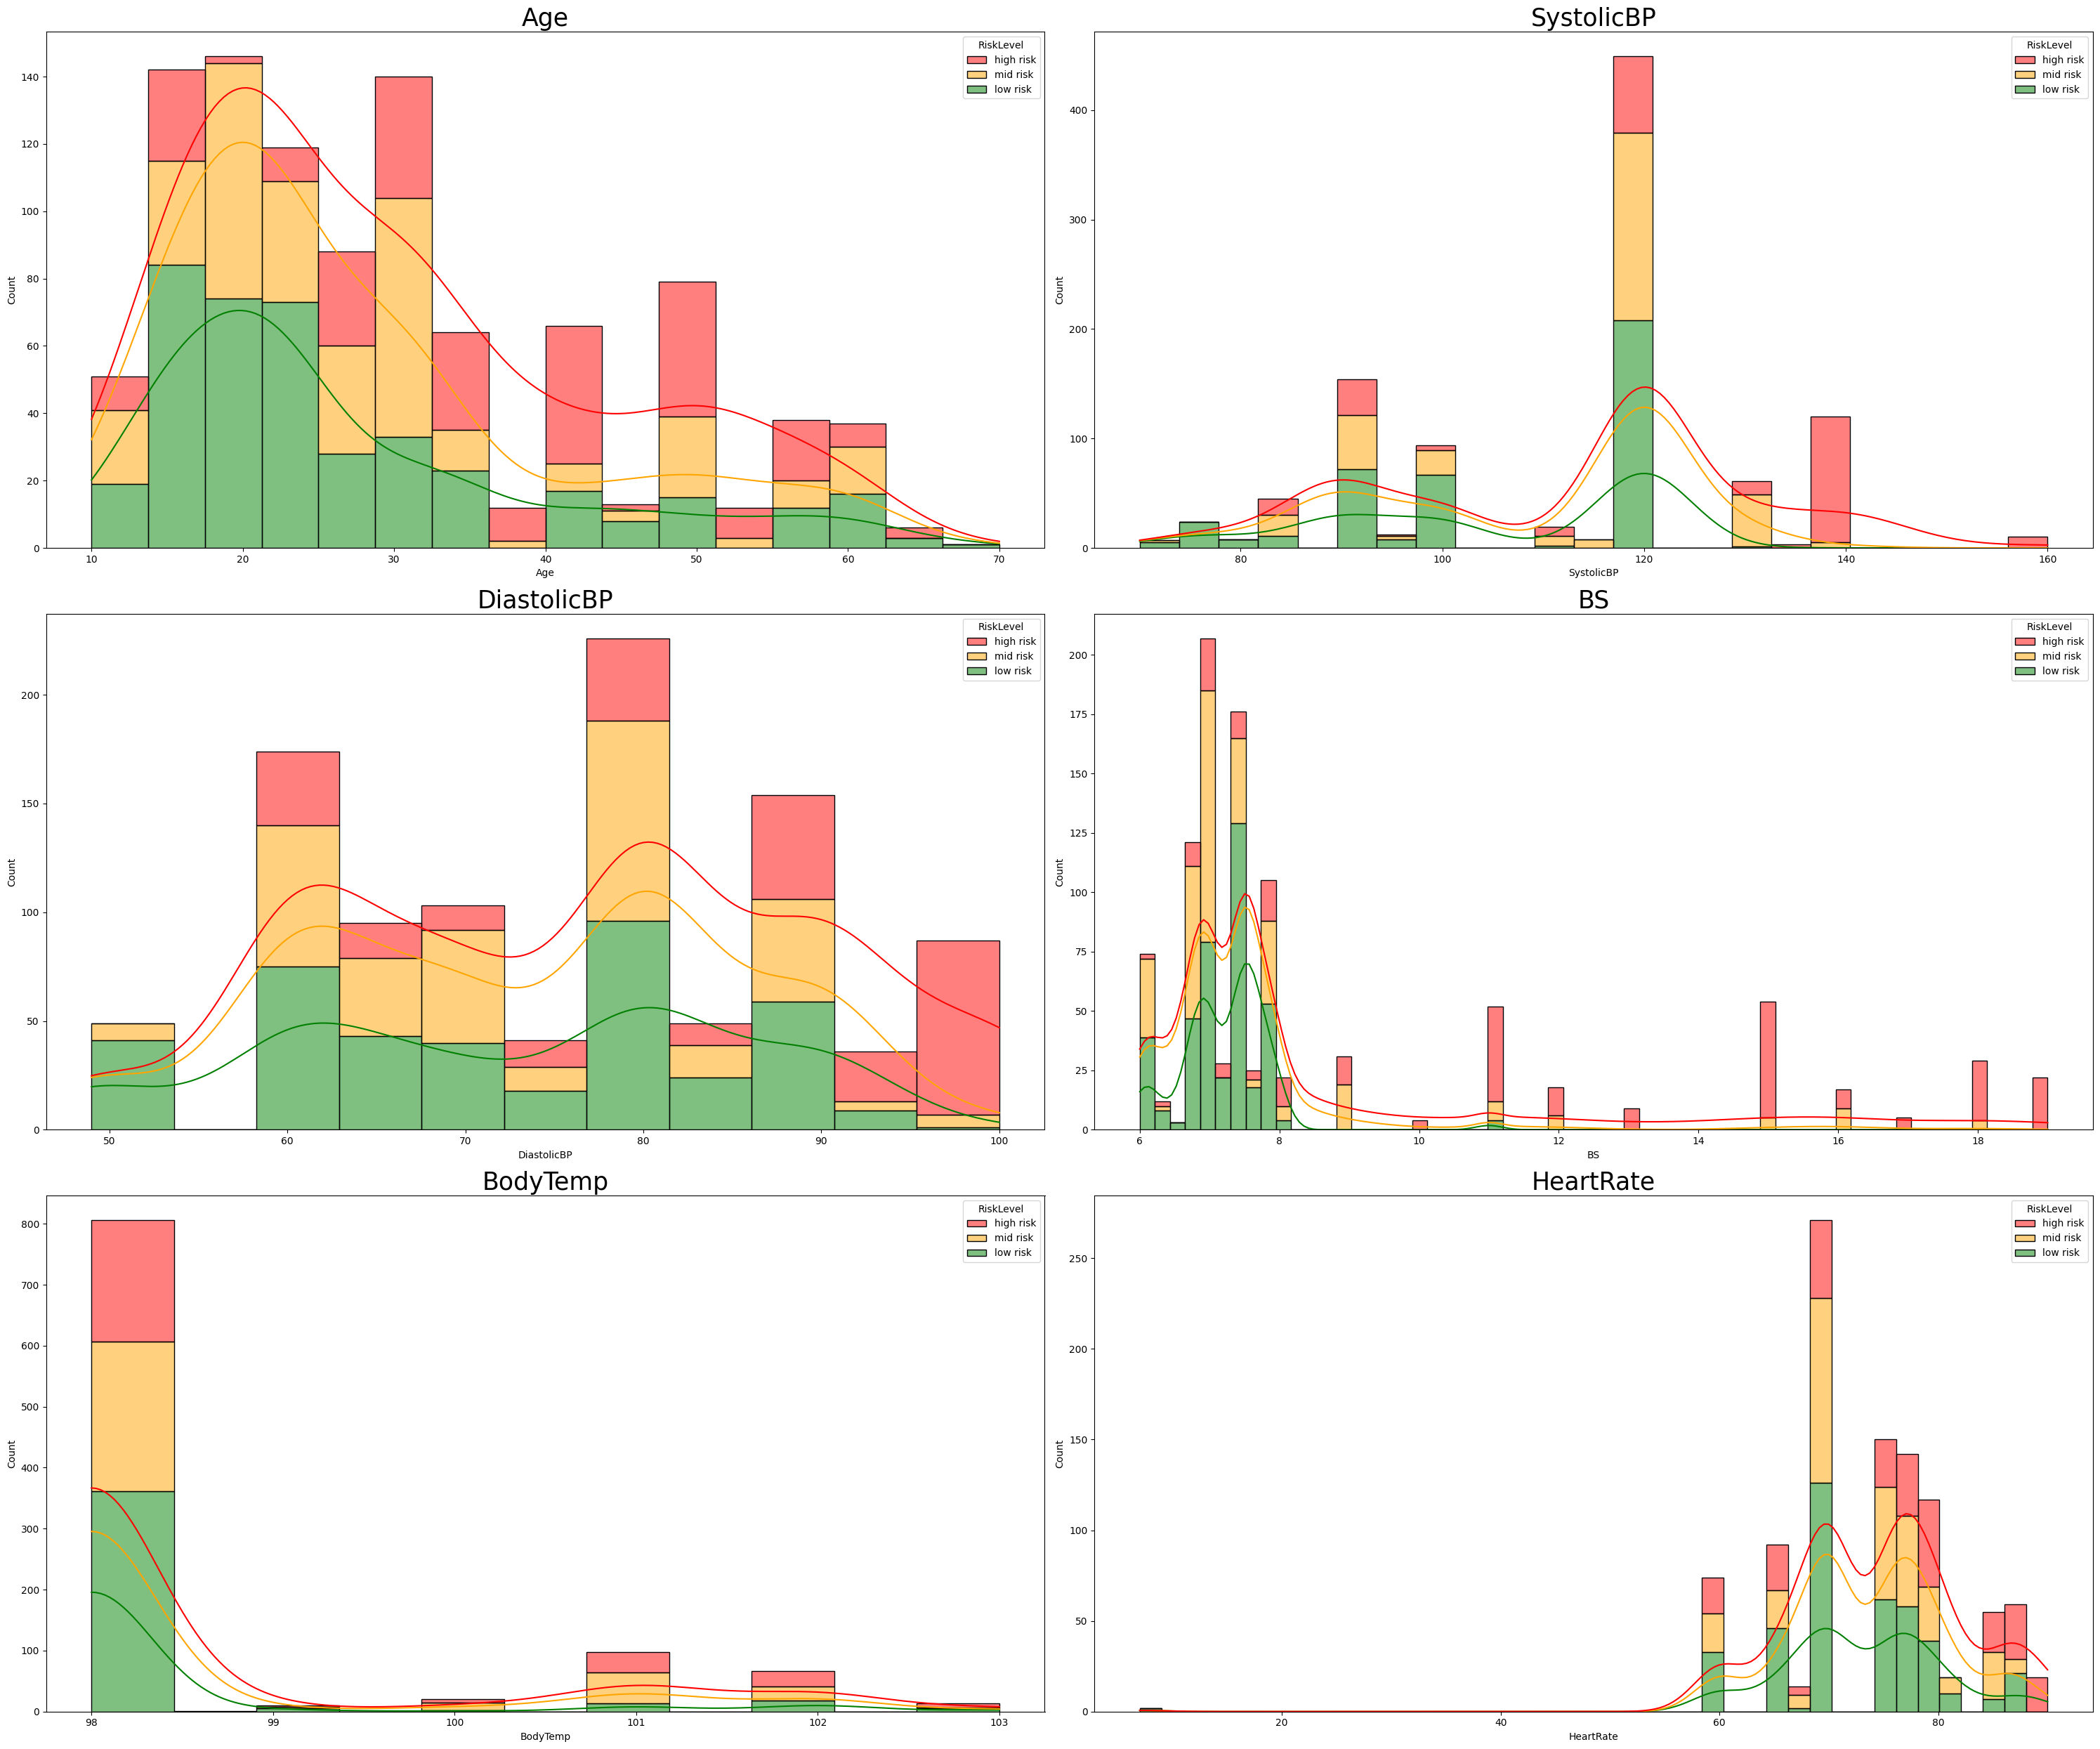

In [ ]:
#Plot Stack Histogram for Feature Variable

fig , axes = plt.subplots(nrows= 3, ncols = 2, figsize=(30, 25))
risk_level_order = ['high risk', 'mid risk', 'low risk']

for ax , col in zip(axes.flatten(), m_df.columns):
  sns.histplot(data= m_df, x = col, kde= True, hue = "RiskLevel", hue_order = risk_level_order, multiple='stack',
               palette = {'low risk':'green', 'mid risk':'orange', 'high risk':'red'}, element='bars', ax=ax)
  ax.set_title(f'{col}', fontsize = 25)

plt.tight_layout()
plt.savefig('material_feature_description.png')
plt.show()

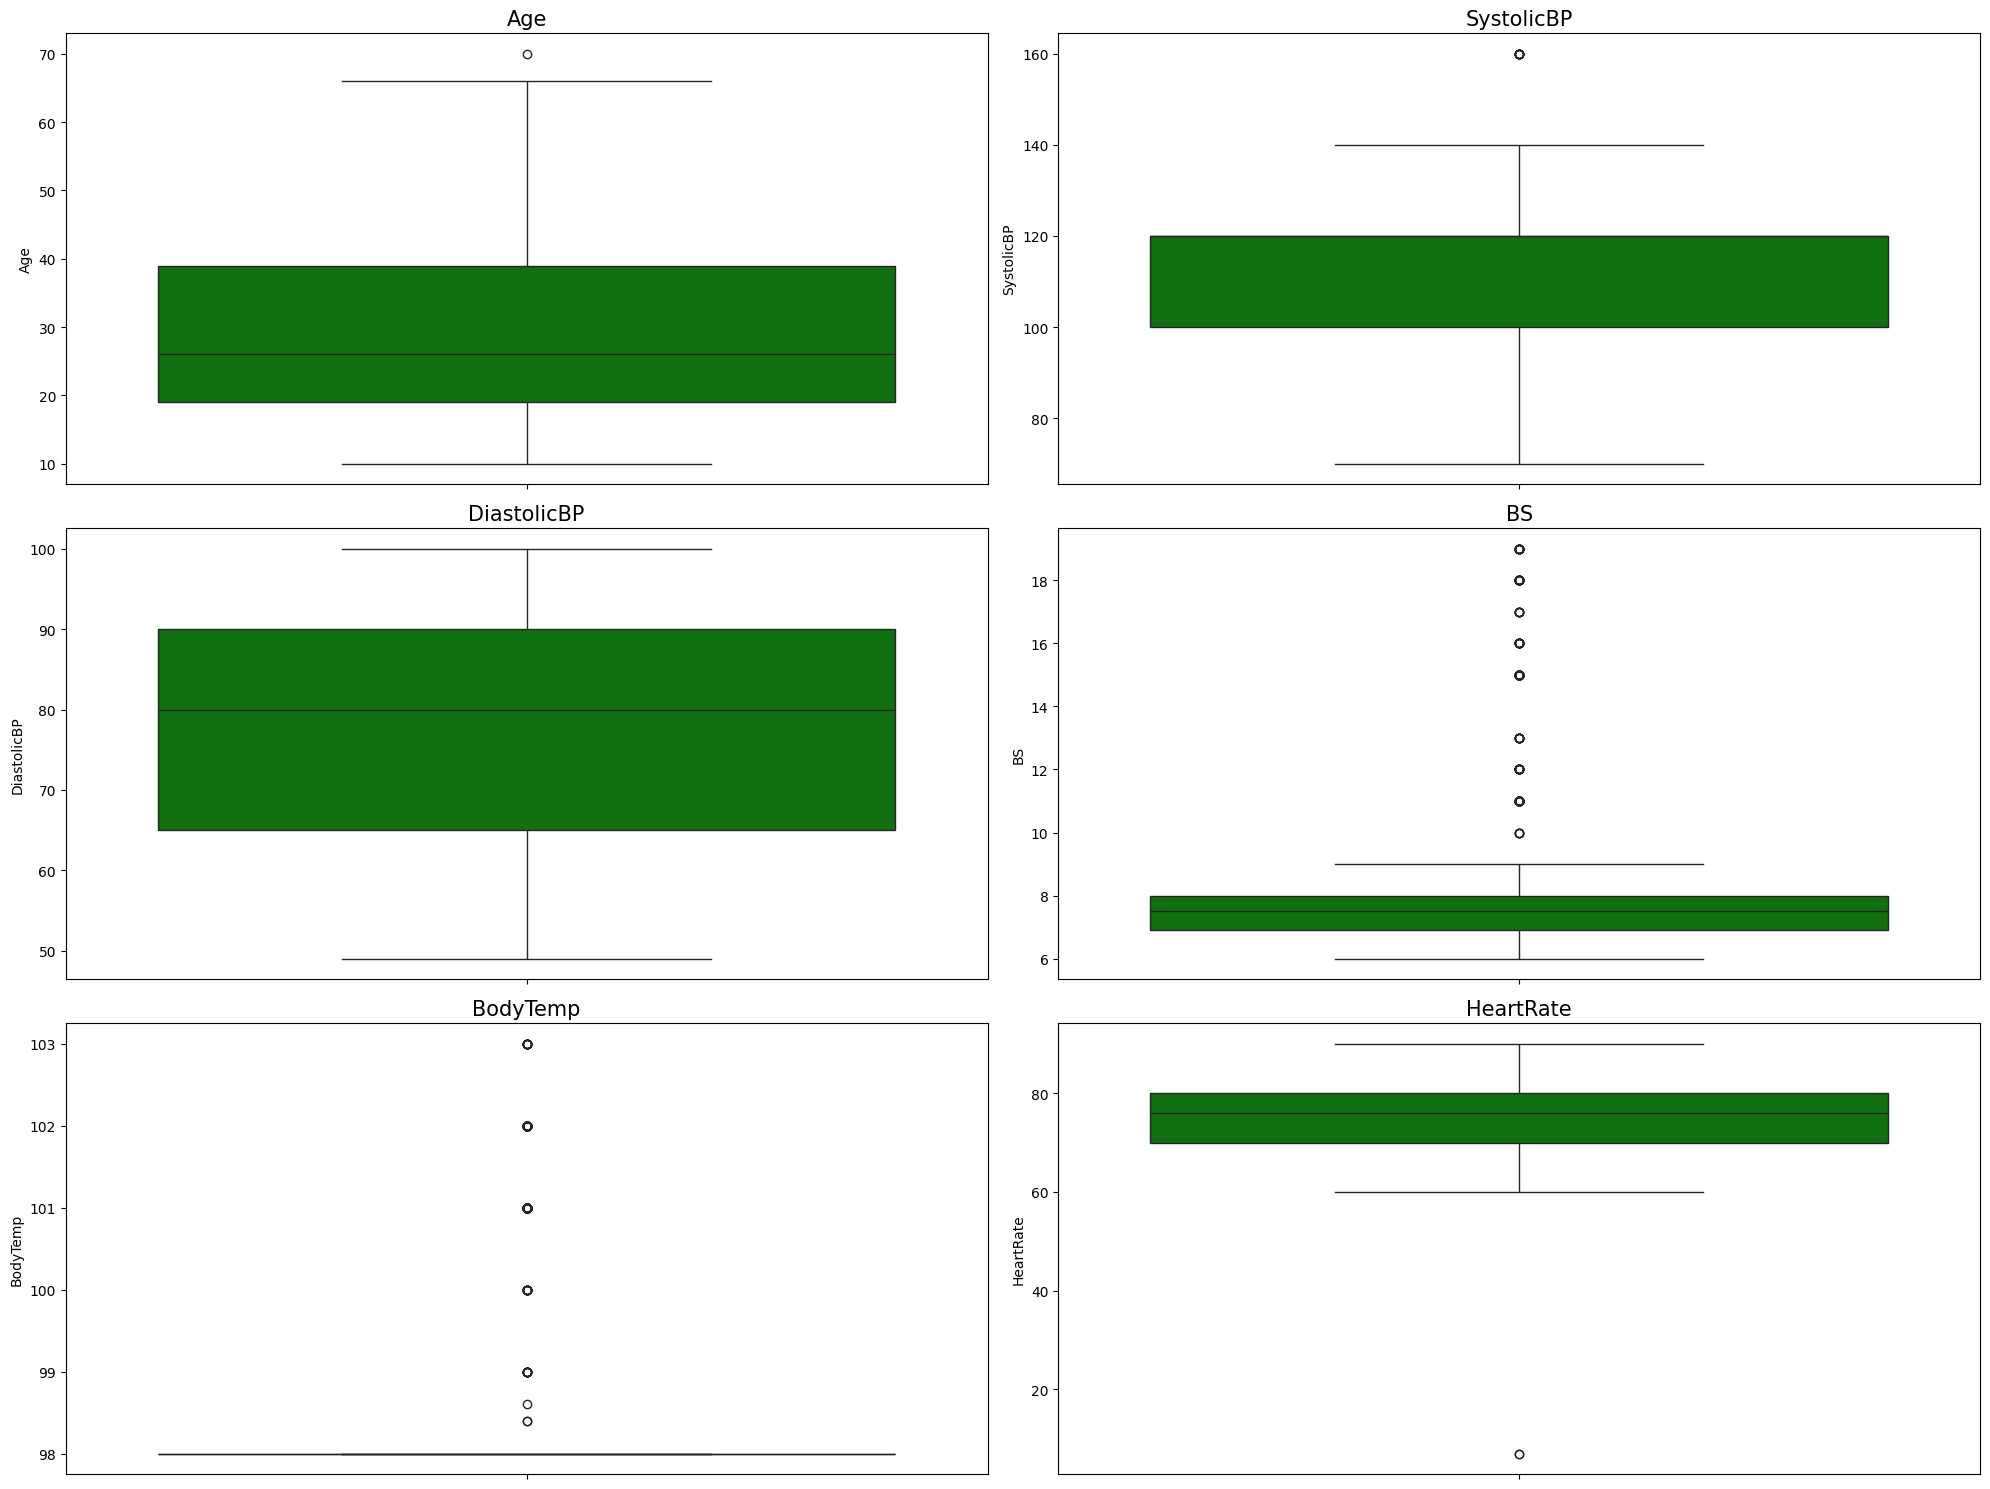

In [ ]:
# to detect outliers

fig , axes = plt.subplots(nrows= 3, ncols = 2, figsize=(20, 15))

for ax , col in zip(axes.flatten(), m_df.columns):
  sns.boxplot(data=m_df, y=col, color = 'green', ax=ax)
  ax.set_title(f'{col}', fontsize = 15)

plt.tight_layout()
plt.savefig('maternal_detect_outliers.png')
plt.show()

In [ ]:
# Correlation Analysis of Variations

risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
m_df['RiskLevel'] = m_df['RiskLevel'].map(risk_mapping)
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


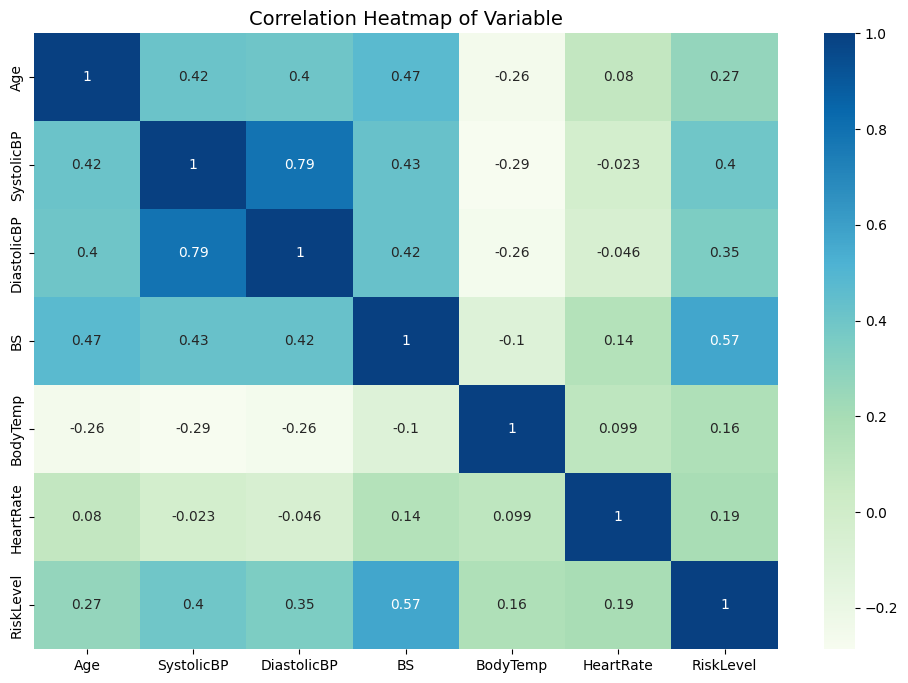

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(m_df.corr(), annot = True, cmap='GnBu')
plt.title('Correlation Heatmap of Variable', fontsize = 14)
plt.savefig('maternal_heatmap_to_check_variable.png')
plt.show()

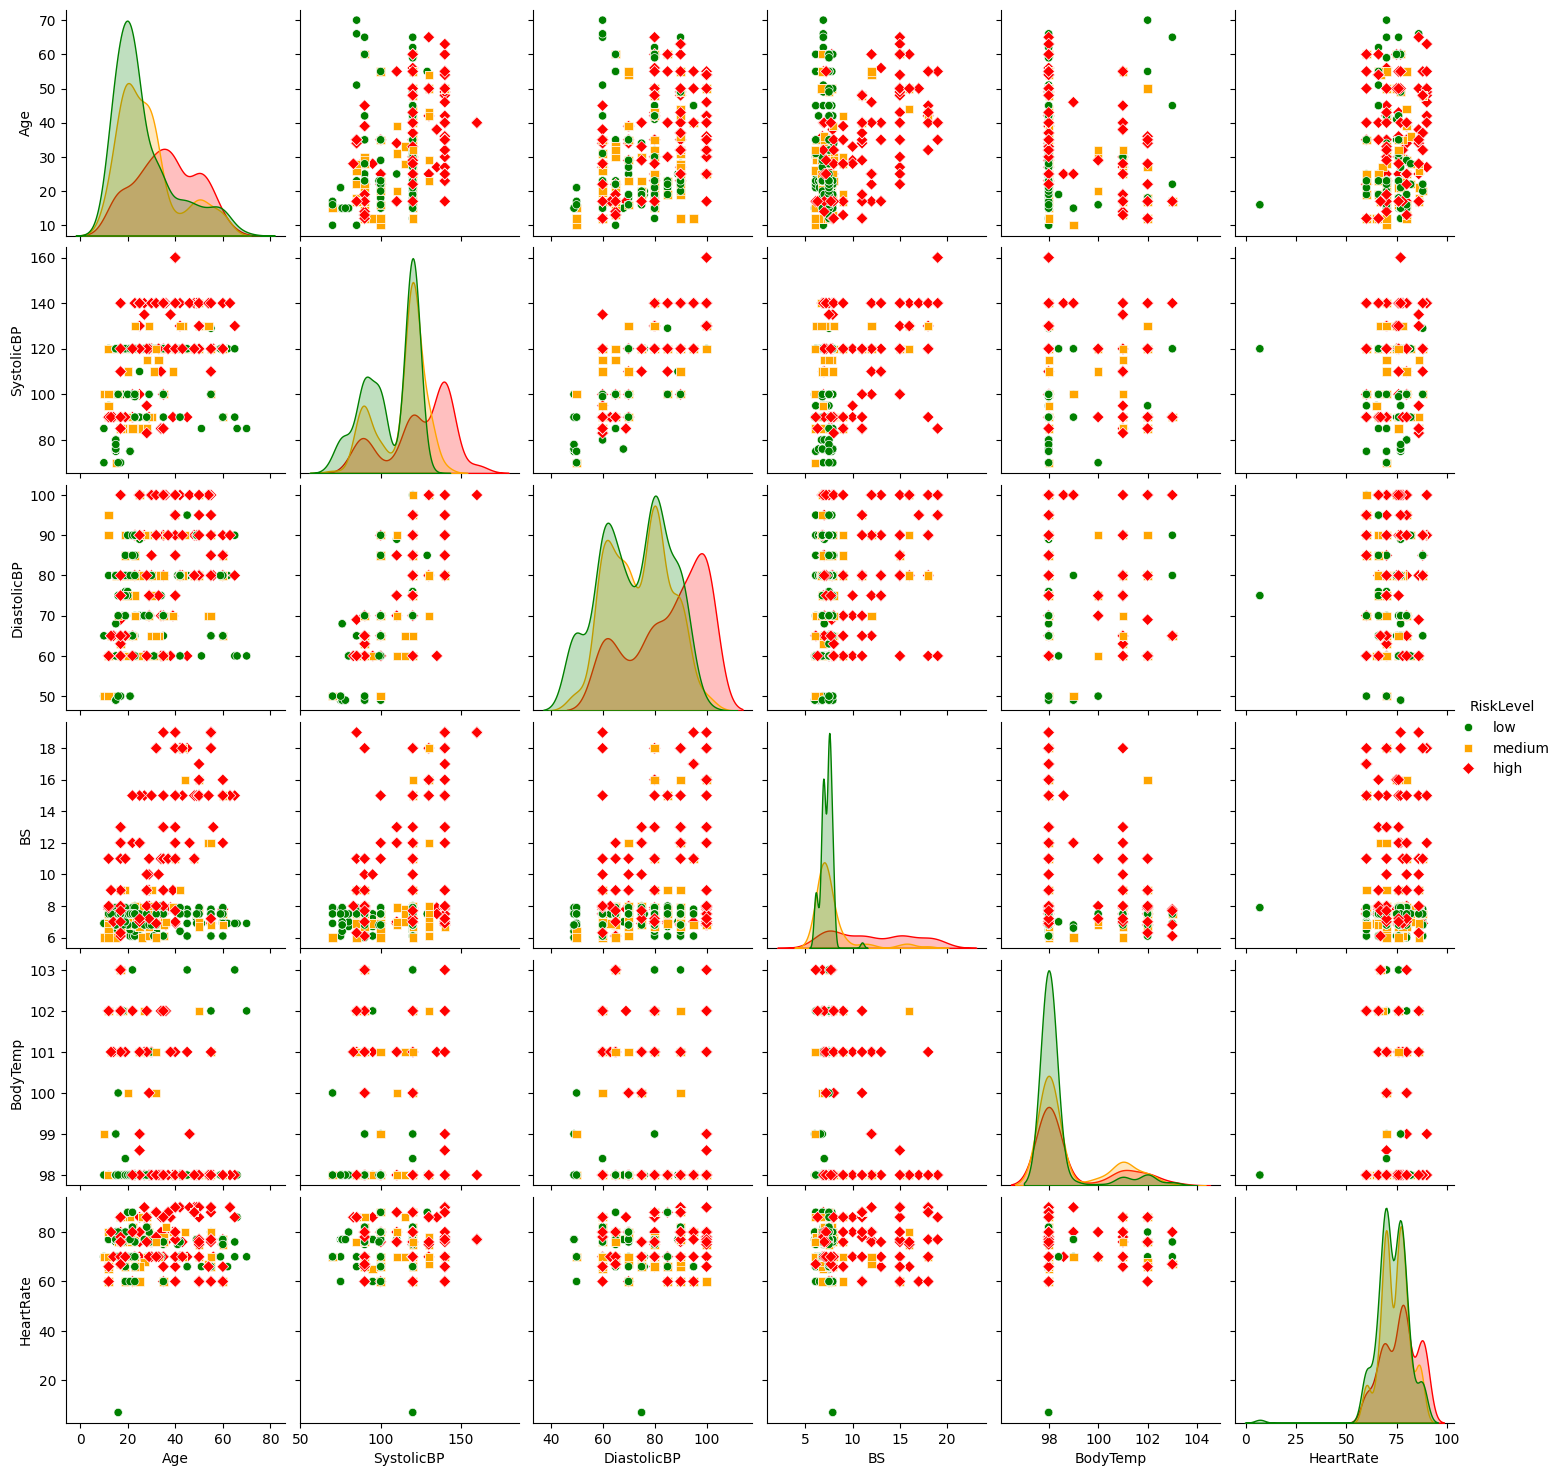

In [ ]:
# Pairplot with RiskLevel

risk_colors = {0: 'green', 1: 'orange', 2:'red'}

plot = sns.pairplot(m_df, hue='RiskLevel', palette = risk_colors, markers =['o', 's', 'D'])

legend_labels = {'0': 'low', '1':'medium', '2':'high'}
for text , label in zip(plot._legend.texts, legend_labels.values()):
  text.set_text(label)
plt.savefig('maternal_pairplot_to_see_patternss.png')
plt.show()

In [ ]:
#Dealing with multicollinearity
# variance inflation factor calculations

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = m_df[['SystolicBP', 'DiastolicBP']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,SystolicBP,79.96833
1,DiastolicBP,79.96833


In [ ]:
# Drop SystolicBP  for model training

m_df = m_df.drop(['SystolicBP'], axis = 1)

In [ ]:
#Identify outlier in Heart Rate

m_df.HeartRate.sort_values().head()

,HeartRate
499,7
908,7
1000,60
1010,60
705,60


In [ ]:
# Remove Outliers

m_df = m_df.drop(m_df.index[m_df['HeartRate'] == 7])

In [ ]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   DiastolicBP  1012 non-null   int64  
 2   BS           1012 non-null   float64
 3   BodyTemp     1012 non-null   float64
 4   HeartRate    1012 non-null   int64  
 5   RiskLevel    1012 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 55.3 KB


**Model Building**

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

columns = ['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
scale_X = StandardScaler()

X = pd.DataFrame(scale_X.fit_transform(m_df.drop(['RiskLevel'], axis=1), ), columns = columns )
y = m_df['RiskLevel']

In [ ]:
X.head()

,Age,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.363796,0.254566,1.903633,-0.485808,1.538308
1,0.378765,0.974379,1.296644,-0.485808,-0.589878
2,-0.066772,-0.465247,-0.220828,0.972192,0.740239
3,0.007484,0.614473,-0.524323,-0.485808,-0.589878
4,0.378765,-1.185059,-0.797468,-0.485808,0.208192


In [ ]:
y.head()

,RiskLevel
0,2
1,2
2,2
3,2
4,0


In [ ]:
# train - test - split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((809, 5), (203, 5), (809,), (203,))

**Logistic Regression**

In [ ]:
# Baseline model of Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg_mod = log_reg.fit(X_train, y_train)
print(f'Baseline Logistic Regression : {round(log_reg_mod.score(X_test, y_test), 3)}')
pred_log_reg = log_reg_mod.predict(X_test)

Baseline Logistic Regression : 0.64


In [ ]:
# Cross Validate

from sklearn.model_selection import cross_val_score
scores_log= cross_val_score(log_reg, X_train , y_train , cv=3, scoring = 'accuracy')
print(f'Score (Cross Validation) for Logistic Regression Model :\n{scores_log}')
print('Cross Validate mean :', round(scores_log.mean(), 3))
print('Cross Validate std : ', round(scores_log.std(), 3))

Score (Cross Validation) for Logistic Regression Model :
[0.6037037  0.5962963  0.57992565]
Cross Validate mean : 0.593
Cross Validate std :  0.01


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Test with new parameter

log_reg_2 = LogisticRegression(C=0.01, intercept_scaling = 1, max_iter= 100, solver='liblinear', tol = 0.0001, random_state= 42)
log_reg_mod_2 =  log_reg_2.fit(X_train, y_train)
pred_log_reg_2 = log_reg_mod_2.predict(X_test)
pred_log_reg_2

array([0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0,
       1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1,
       0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2])

In [ ]:
print(pred_log_reg)

[0 1 0 0 0 0 2 0 0 1 0 2 0 0 2 0 0 0 2 2 1 0 2 1 0 2 0 0 2 0 2 2 2 0 0 1 0
 0 0 2 0 0 0 1 0 0 2 0 0 0 1 1 1 0 2 0 0 2 1 0 0 2 0 0 2 1 0 1 2 2 2 1 1 0
 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2 2 1 2 2 0 2 0 2 0 0 0 0 0 0 1 0 2 2 0 2
 2 2 2 0 1 2 2 1 0 0 0 0 0 0 2 0 0 1 0 0 2 0 0 0 0 0 2 2 0 2 0 0 0 1 2 1 0
 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 1 0 0 2 2 0 0 1 1 2 2 2 0 2 0 0 2 0 2 0 0 0
 0 0 0 0 0 2 2 0 1 0 1 2 0 0 0 0 0 2]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, precision_recall_fscore_support

mse_log_reg = mean_squared_error(y_test, pred_log_reg_2)
rmse_log_reg = np.sqrt(mean_squared_error(y_test, pred_log_reg_2))

score_log_reg_test = log_reg_mod_2.score(X_test, y_test)
score_log_reg_train = log_reg_mod_2.score(X_train, y_train)

In [ ]:
mse_log_reg, rmse_log_reg, score_log_reg_test, score_log_reg_train

(0.5123152709359606,
 np.float64(0.7157620211606374),
 0.6354679802955665,
 0.6093943139678616)

In [ ]:
print('Classification Report')
print(classification_report(y_test, pred_log_reg_2))
print('Confusion Matrix')
print(confusion_matrix(y_test, pred_log_reg_2))

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.88      0.70        81
           1       0.56      0.21      0.30        67
           2       0.77      0.80      0.79        55

    accuracy                           0.64       203
   macro avg       0.64      0.63      0.60       203
weighted avg       0.63      0.64      0.59       203

Confusion Matrix
[[71  6  4]
 [44 14  9]
 [ 6  5 44]]


[Text(0, 0.5, 'Low'), Text(0, 1.5, 'Medium'), Text(0, 2.5, 'High')]

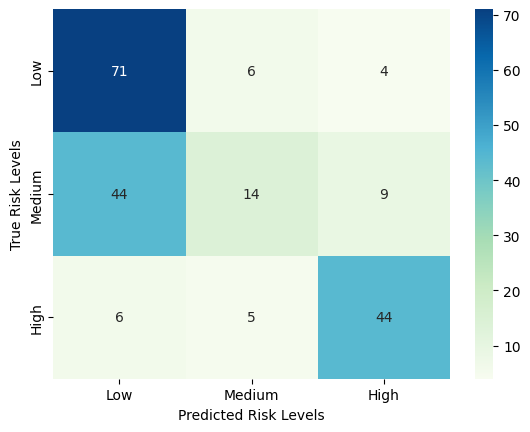

In [ ]:
ax = plt.subplot()

sns.heatmap(confusion_matrix(y_test, pred_log_reg_2), annot=True, cmap='GnBu')
ax.set_xlabel('Predicted Risk Levels')
ax.set_ylabel('True Risk Levels')

ax.xaxis.set_ticklabels(['Low', 'Medium', 'High'])
ax.yaxis.set_ticklabels(['Low', 'Medium', 'High'])

**K-Nearest Neighbors**

In [ ]:
#Baseline Model of K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print('Baseline K-Nearest Neighbors : ', round(knn_mod.score(X_test, y_test), 3))
print(knn_mod.predict(X_test))

Baseline K-Nearest Neighbors :  0.665
[1 0 1 0 0 0 2 0 0 1 0 2 0 0 2 0 1 1 2 2 2 0 0 1 0 2 1 0 2 1 2 2 2 1 0 0 0
 0 0 1 0 1 1 1 0 0 2 1 0 0 0 0 0 0 2 0 2 2 2 0 0 0 0 0 2 2 0 1 2 2 2 1 0 0
 1 2 2 0 0 1 2 1 2 1 1 2 1 2 0 2 2 2 0 2 2 1 2 0 2 1 1 1 0 1 1 0 1 0 2 1 1
 2 0 2 0 2 2 2 0 0 0 0 0 1 0 0 0 1 0 1 0 2 0 1 0 0 1 1 2 0 1 0 0 1 0 2 1 1
 0 0 1 1 1 0 0 2 0 0 1 1 2 1 0 1 1 0 2 2 1 1 1 0 2 2 0 1 2 0 1 2 0 2 1 0 0
 0 0 0 1 0 2 2 0 0 0 0 2 0 0 0 1 0 2]


In [ ]:
# Cross Validate for KNN

scores_knn = cross_val_score(knn, X_train, y_train, cv = 3, scoring = 'accuracy')
print(f'Score (Cross Validation) for KNN Model :\n{scores_knn}')
print('Cross Validate mean :', round(scores_knn.mean(), 3))
print('Cross Validate std : ', round(scores_knn.std(), 3))

Score (Cross Validation) for KNN Model :
[0.61481481 0.68148148 0.62453532]
Cross Validate mean : 0.64
Cross Validate std :  0.029


In [ ]:
params_knn = {'leaf_size': list(range(1, 30)),
              'n_neighbors': list(range(1, 21)),
              'p': [1, 2],
              'weights': ['uniform', 'distance']}

In [ ]:
GridSearchCV_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=params_knn, cv =3, scoring = 'accuracy', return_train_score=True)

In [ ]:
GridSearchCV_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [ ]:
print('Best estimator for KNN model', GridSearchCV_knn.best_estimator_)
print('Best parameter Value', GridSearchCV_knn.best_params_)
print('Best Score', GridSearchCV_knn.best_score_)

Best estimator for KNN model KNeighborsClassifier(leaf_size=1, n_neighbors=10, weights='distance')
Best parameter Value {'leaf_size': 1, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Best Score 0.7948184863922162


In [ ]:
# Test with new paramters

knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 10, p= 2, weights= 'distance')
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)


In [ ]:
mse_knn_reg = mean_squared_error(y_test, pred_knn)
rmse_knn_reg = np.sqrt(mean_squared_error(y_test, pred_knn))

score_knn_reg_test = knn_mod.score(X_test, y_test)
score_knn_reg_train = knn_mod.score(X_train, y_train)

In [ ]:
mse_knn_reg, rmse_knn_reg, score_knn_reg_test, score_knn_reg_train

(0.2512315270935961,
 np.float64(0.5012300141587653),
 0.8374384236453202,
 0.934487021013597)

In [ ]:
print('Classification Report')
print(classification_report(y_test, pred_knn))
print('Confusion Matrix')
print(confusion_matrix(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        81
           1       0.77      0.85      0.81        67
           2       0.88      0.93      0.90        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix
[[62 17  2]
 [ 5 57  5]
 [ 4  0 51]]


[Text(0, 0.5, 'Low'), Text(0, 1.5, 'Medium'), Text(0, 2.5, 'High')]

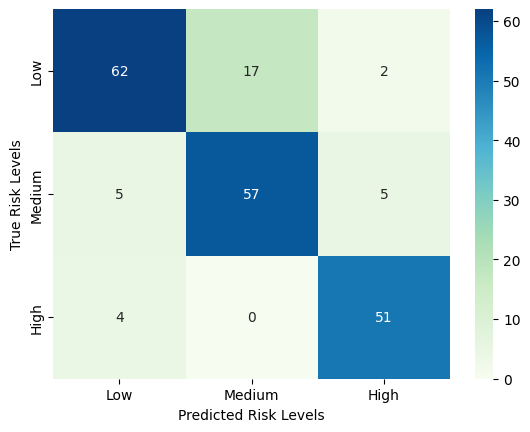

In [ ]:
ax = plt.subplot()

sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, cmap='GnBu')
ax.set_xlabel('Predicted Risk Levels')
ax.set_ylabel('True Risk Levels')

ax.xaxis.set_ticklabels(['Low', 'Medium', 'High'])
ax.yaxis.set_ticklabels(['Low', 'Medium', 'High'])

**Random Forest**

In [ ]:
#Baseline for Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print('Baseline for Random Forest Classifier: ', random_forest_mod.score(X_test, y_test))
pred_random_forest = random_forest_mod.predict(X_test)

Baseline for Random Forest Classifier:  0.8423645320197044


In [ ]:
# Cross Validation for Random Forest

scores_rf = cross_val_score(random_forest, X_train, y_train, cv = 3, scoring = 'accuracy')
print(f'Score (Cross Validation) for Random Forest Model :\n{scores_rf}')
print('Cross Validate mean :', round(scores_rf.mean(), 3))
print('Cross Validate std : ', round(scores_rf.std(), 3))

Score (Cross Validation) for Random Forest Model :
[0.80740741 0.8        0.83271375]
Cross Validate mean : 0.813
Cross Validate std :  0.014


In [ ]:
params_rf = {'min_samples_split':[2, 6, 20],
             'min_samples_leaf': [1, 2, 4],
             'n_estimators': [50, 100, 200, 300, 400],
             'max_depth': [None, 10, 20, 30],
             'criterion': ['gini', 'entropy']}

In [ ]:
GridSearchCV_rf = GridSearchCV(estimator = RandomForestClassifier(),
                               param_grid = params_rf,
                               cv =3,
                               scoring ='accuracy',
                               return_train_score = True)

In [ ]:
GridSearchCV_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [50, 100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy')

In [ ]:
print('Best estimator for RF model', GridSearchCV_rf.best_estimator_)
print('Best parameter Value', GridSearchCV_rf.best_params_)
print('Best Score', GridSearchCV_rf.best_score_)

Best estimator for RF model RandomForestClassifier(max_depth=30, n_estimators=200)
Best parameter Value {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score 0.8195511496626738


In [ ]:
#Test with new paramater

rf = RandomForestClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
rf_mod = rf.fit(X_train, y_train)
predict_rf = rf_mod.predict(X_test)

In [ ]:
mse_rf_reg = mean_squared_error(y_test, predict_rf)
rmse_rf_reg = np.sqrt(mean_squared_error(y_test, predict_rf))

score_rf_reg_test = rf_mod.score(X_test, y_test)
score_rf_reg_train = rf_mod.score(X_train, y_train)

In [ ]:
mse_rf_reg, rmse_rf_reg, score_rf_reg_test, score_rf_reg_train

(0.22167487684729065,
 np.float64(0.47082361543075835),
 0.8374384236453202,
 0.934487021013597)

In [ ]:
print('Classification Report')
print(classification_report(y_test, predict_rf))
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_rf))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        81
           1       0.77      0.81      0.79        67
           2       0.88      0.96      0.92        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix
[[63 16  2]
 [ 8 54  5]
 [ 2  0 53]]


[Text(0, 0.5, 'Low'), Text(0, 1.5, 'Medium'), Text(0, 2.5, 'High')]

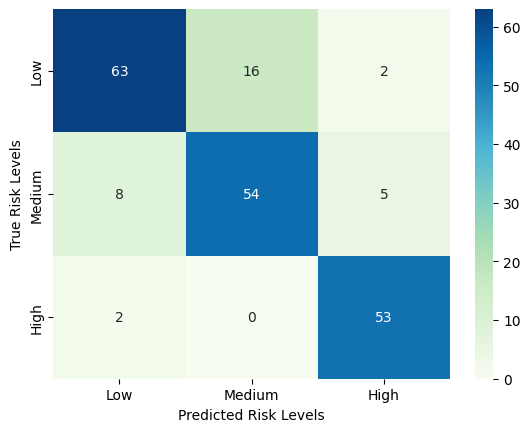

In [ ]:
ax = plt.subplot()

sns.heatmap(confusion_matrix(y_test, predict_rf), annot=True, cmap='GnBu')
ax.set_xlabel('Predicted Risk Levels')
ax.set_ylabel('True Risk Levels')

ax.xaxis.set_ticklabels(['Low', 'Medium', 'High'])
ax.yaxis.set_ticklabels(['Low', 'Medium', 'High'])

**Gradient Boosting Classifier**

In [ ]:
#Baseline for Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print('Baseline for Gradient Boosting Classifier: ', gbc.score(X_test, y_test))
pred_gbc = gbc_mod.predict(X_test)

Baseline for Gradient Boosting Classifier:  0.7832512315270936


In [ ]:
# Cross Validation for Gradient Boosting

scores_gbc = cross_val_score(gbc, X_train, y_train, cv = 3, scoring = 'accuracy')
print(f'Score (Cross Validation) for Gradient Boosting Model :\n{scores_gbc}')
print('Cross Validate mean :', round(scores_gbc.mean(), 3))
print('Cross Validate std : ', round(scores_gbc.std(), 3))

Score (Cross Validation) for Gradient Boosting Model :
[0.74814815 0.78518519 0.78810409]
Cross Validate mean : 0.774
Cross Validate std :  0.018


In [ ]:
params_gbc = {'loss': ['log_loss'],
              'learning_rate': [0.05, 0.1],
              'n_estimators': [100, 250],
              'max_depth': [ 5, 10],
              'subsample': [0.8, 1]}

In [ ]:
GridSearchCV_gbc = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params_gbc,
    cv=3,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)


In [ ]:
GridSearchCV_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'loss': ['log_loss'],
                         'max_depth': [5, 10], 'n_estimators': [100, 250],
                         'subsample': [0.8, 1]},
             return_train_score=True, scoring='accuracy')

In [ ]:
print('Best estimator for GBC model', GridSearchCV_gbc.best_estimator_)
print('Best parameter Value', GridSearchCV_gbc.best_params_)
print('Best Score', GridSearchCV_gbc.best_score_)

Best estimator for GBC model GradientBoostingClassifier(max_depth=10, subsample=0.8)
Best parameter Value {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Best Score 0.8195419707191701


In [ ]:
#Test with new paramater

gbc = GradientBoostingClassifier(learning_rate= 0.1, loss= 'log_loss', max_depth= 10, n_estimators= 100, subsample= 0.8)
gbc_mod = gbc.fit(X_train, y_train)
predict_gbc = gbc_mod.predict(X_test)

In [ ]:
mse_gbc_reg = mean_squared_error(y_test, predict_gbc)
rmse_gbc_reg = np.sqrt(mean_squared_error(y_test, predict_gbc))

score_gbc_reg_test = gbc_mod.score(X_test, y_test)
score_gbc_reg_train = gbc_mod.score(X_train, y_train)

In [ ]:
mse_gbc_reg, rmse_gbc_reg, score_gbc_reg_test, score_gbc_reg_train

(0.2315270935960591,
 np.float64(0.4811726234898024),
 0.8423645320197044,
 0.934487021013597)

In [ ]:
print('Classification Report')
print(classification_report(y_test, predict_gbc))
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_gbc))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        81
           1       0.80      0.79      0.80        67
           2       0.87      0.96      0.91        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix
[[65 13  3]
 [ 9 53  5]
 [ 2  0 53]]


[Text(0, 0.5, 'Low'), Text(0, 1.5, 'Medium'), Text(0, 2.5, 'High')]

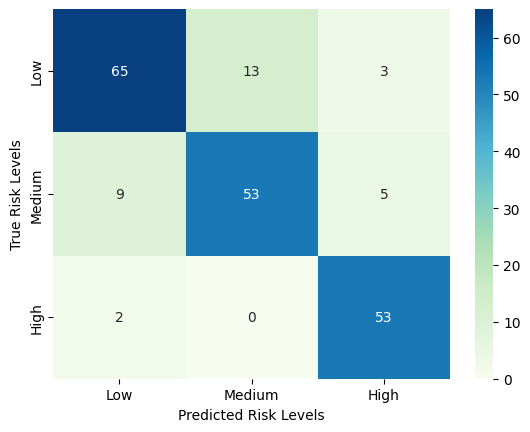

In [ ]:
ax = plt.subplot()

sns.heatmap(confusion_matrix(y_test, predict_gbc), annot=True, cmap='GnBu')
ax.set_xlabel('Predicted Risk Levels')
ax.set_ylabel('True Risk Levels')

ax.xaxis.set_ticklabels(['Low', 'Medium', 'High'])
ax.yaxis.set_ticklabels(['Low', 'Medium', 'High'])

In [ ]:
# Create dataframe to store model evaluation results

result = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting Classifier'],
    'Train_Score': [
        cross_val_score(log_reg_mod_2, X_train, y_train, cv=3).mean(),
        cross_val_score(knn_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(rf_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(gbc_mod, X_train, y_train, cv=3).mean()
    ],
    'Test Score': [
        log_reg_mod_2.score(X_test, y_test),
        knn_mod.score(X_test, y_test),
        rf_mod.score(X_test, y_test),
        gbc_mod.score(X_test, y_test)
    ]
})

metrics = ['precision', 'recall', 'f1']
for metric in metrics :
  result[f'{metric.capitalize()}'] = [
      precision_recall_fscore_support(y_test, model.predict(X_test), average='weighted')[metrics.index(metric)]
      for model in [log_reg_mod, knn_mod, rf_mod, gbc_mod]
  ]

result_df = result.sort_values(by='Test Score', ascending = False)
result_df = result_df.set_index('Test Score')
result_df

,Model,Train_Score,Precision,Recall,F1
Test Score,,,,,
0.842365,Gradient Boosting Classifier,0.809661,0.841706,0.842365,0.841021
0.837438,Random Forest,0.813369,0.838291,0.837438,0.836384
0.665025,K-Nearest Neighbors,0.640277,0.662459,0.665025,0.661801
0.635468,Logistic Regression,0.601960,0.623058,0.640394,0.597569


In [ ]:
# save the model

import pickle

In [ ]:
pickle.dump(gbc_mod, open('finalized_maternal_model.sav', 'wb'))


In [ ]:
import os

for root, dirs, files in os.walk("/kaggle/input", topdown=True):
    for name in files:
        print(os.path.join(root, name))


/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv


In [ ]:
maternal_model = pickle.load(open('/content/finalized_maternal_model.sav', 'rb'))


In [ ]:
maternal_model.predict([[1, 2, 78, 56, 76]])

array([2])

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.6.1'

In [ ]:
pip install scikit-learn==1.6.1